In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [25]:
dataset = pd.read_csv('iris.csv')

In [26]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


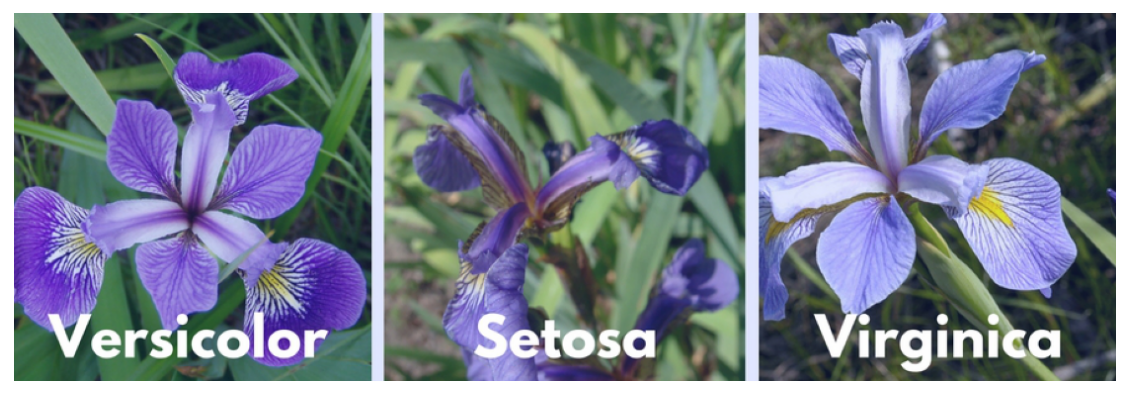

In [28]:
%matplotlib inline
img=mpimg.imread('iristype.png')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img)

In [29]:
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Using Linear **Kernal**

In [32]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [33]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [34]:
y_compare = np.vstack((y_test,y_pred))
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica', 'setosa', 'setosa', 'setosa',
        'versicolor', 'versicolor', 'versicolor', 'virginica',
        'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
        'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
        'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
        'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
        'versicolor'],
       ['virginica', 'virginica', 'setosa', 'setosa', 'setosa',
        'virginica', 'versicolor', 'versicolor', 'virginica',
        'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
        'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
        'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
        'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
        'versicolor']], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [36]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelLinearAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))  

Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667


### Using Polynomial kernal

In [37]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred))
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


array([['virginica', 'virginica', 'setosa', 'setosa', 'setosa',
        'versicolor', 'versicolor', 'versicolor', 'virginica',
        'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
        'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
        'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
        'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
        'versicolor'],
       ['virginica', 'virginica', 'setosa', 'setosa', 'setosa',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
        'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
        'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
        'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
        'versicolor']], dtype=object)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelPolyAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

[[11  0  0]
 [ 0  9  0]
 [ 0  2  8]]
Correct predictions:  28
False predictions 2
Accuracy of the SVC Clasification is:  0.9333333333333333


### Using RBF Kernal

In [39]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred))
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelRbfAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']
[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
Correct predictions:  28
False predictions 2
Accuracy of the SVC Clasification is:  0.9333333333333333


### Using Sigmoid Kernal

In [40]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svcclassifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred))
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelSigmoidAccuracy = corrPred/(cm.sum())


print('\n\nAccuracy of SVC classfication with different kernels are :\n\n\n')
print ('Accuracy of the SVC Clasification with Linear kernel and no other adjust is: \t\t\t', kernelLinearAccuracy)
print ('Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is: \t\t', kernelPolyAccuracy)
print ('Accuracy of the SVC Clasification with Radial Basis Function kernel and no other adjust is: \t', kernelRbfAccuracy)
print ('Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is: \t\t\t', kernelSigmoidAccuracy)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']
[[11  0  0]
 [ 0  4  5]
 [ 0  0 10]]
Correct predictions:  25
False predictions 5


Accuracy of SVC classfication with different kernels are :



Accuracy of the SVC Clasification with Linear kernel and no other adjust is: 			 0.9666666666666667
Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is: 		 0.9333333333333333
Accuracy of the SVC Clasification with Radial Basis Function kernel and no other adjust is: 	 0.9333333333333333
Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is: 			 0.8333333333333334
